# COVID-19: Growth dynamics of SARS-COV2 in Portugal and NY State. 

This code uses the data repository of the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 

In [86]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline  

In [87]:
data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [88]:
df = pd.read_csv(data)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [89]:
df = df[(df['Country/Region'] == 'Portugal') | (df['Province/State'] == 'New York')]
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
59,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,59,59,112,169,245,331,448,448,785,1020
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,220,328,421,525,732,967,1706,2495,5365,8310


In [90]:
df = df.replace(to_replace = ['US'], value ='New York') 

In [91]:
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df = df.set_index(['Country/Region'])

In [92]:
df = df.transpose()[40:] #data availability for Portugal starts on 3/2/20. New York still empty. 

# Total Number of Cases

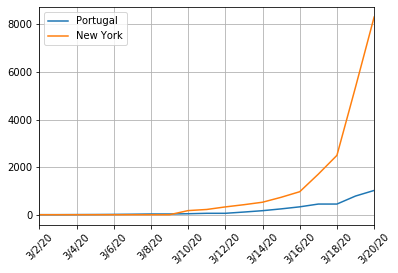

In [104]:
df.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

# Total Number of New Cases

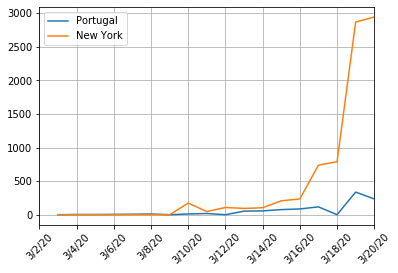

In [103]:
df_newcases = df.diff()
df_newcases.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

# Daily of Percentage Increase  

### 3 day moving average

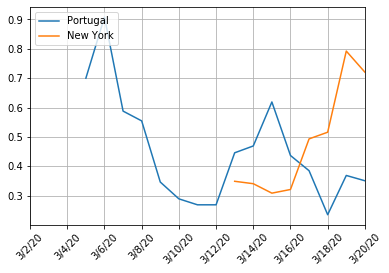

In [105]:
df_movingavg = df.pct_change().rolling(window=3).mean()
df_movingavg.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

### 5 day moving average

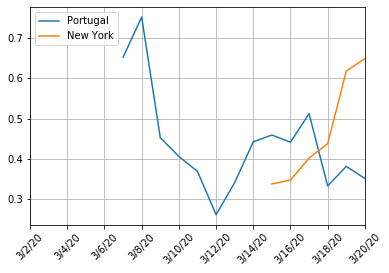

In [106]:
df_movingavg = df.pct_change().rolling(window=5).mean()
df_movingavg.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()